In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ***Converting given files to csv file***

In [2]:
data_file = "spambase.data"
names_file = "spambase.names"

In [3]:
with open(names_file, "r") as f:
    lines = f.readlines()

column_names = [
    line.split(":")[0].strip()
    for line in lines
    if ':' in line and not line.strip().startswith('|')
]

column_names.append("target")

In [4]:
dataset = pd.read_csv(data_file, header=None, names=column_names)

In [5]:
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# ***scaling the feature and saved into new csv data set***

In [6]:
scaler = StandardScaler()
X = dataset.drop("target", axis=1)
scaled_features = scaler.fit_transform(X)

In [7]:
scaled_data = pd.DataFrame(scaled_features, columns=X.columns)
scaled_data["target"] = dataset["target"].values

In [8]:
scaled_data.to_csv("spambase_processeds.csv", index=False)

In [9]:
new_data = pd.read_csv("spambase_processeds.csv")

# ***Data Cleanig and Preprocessing***

In [10]:
new_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1


In [11]:
new_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

In [12]:
new_data.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [13]:
new_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
count,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,...,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000
mean,1.853187e-17,9.265934e-17,2.470916e-17,9.574799e-17,4.941832e-17,3.706374e-17,-2.470916e-17,2.470916e-17,6.177290e-17,1.235458e-17,...,4.941832e-17,-6.795019e-17,1.235458e-17,3.706374e-17,0.000000,3.706374e-17,8.030476e-17,4.941832e-17,4.941832e-17,0.394045
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,...,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,0.488698
min,-3.424337e-01,-1.650719e-01,-5.567606e-01,-4.689958e-02,-4.643144e-01,-3.502662e-01,-2.917939e-01,-2.625616e-01,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-5.143065e-01,-1.551977e-01,-3.299123e-01,-0.308355,-1.030484e-01,-1.321161e-01,-2.625994e-01,-4.656073e-01,0.000000
25%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-4.689958e-02,-4.643144e-01,-3.502662e-01,-2.917939e-01,-2.625616e-01,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-5.143065e-01,-1.551977e-01,-3.299123e-01,-0.308355,-1.030484e-01,-1.135824e-01,-2.369413e-01,-4.095278e-01,0.000000
50%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-4.689958e-02,-4.643144e-01,-3.502662e-01,-2.917939e-01,-2.625616e-01,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-2.738561e-01,-1.551977e-01,-3.299123e-01,-0.308355,-1.030484e-01,-9.189671e-02,-1.907567e-01,-3.105639e-01,0.000000
75%,-3.424337e-01,-1.650719e-01,2.764271e-01,-4.689958e-02,1.007920e-01,-3.502662e-01,-2.917939e-01,-2.625616e-01,-3.233024e-01,-1.231813e-01,...,-1.584534e-01,1.811501e-01,-1.551977e-01,5.631450e-02,-0.096848,-1.030484e-01,-4.682327e-02,-4.707129e-02,-2.851691e-02,1.000000
max,1.452700e+01,1.090096e+01,9.560519e+00,3.064128e+01,1.440691e+01,2.112571e+01,1.828261e+01,2.744125e+01,1.855779e+01,2.782844e+01,...,1.785384e+01,3.556066e+01,3.715432e+01,3.949191e+01,24.108447,4.608659e+01,3.458704e+01,5.099205e+01,2.566085e+01,1.000000


# ***Checking target column is it imbalance or not or balance the data***

<Axes: title={'center': 'target columns distribution'}, xlabel='target'>

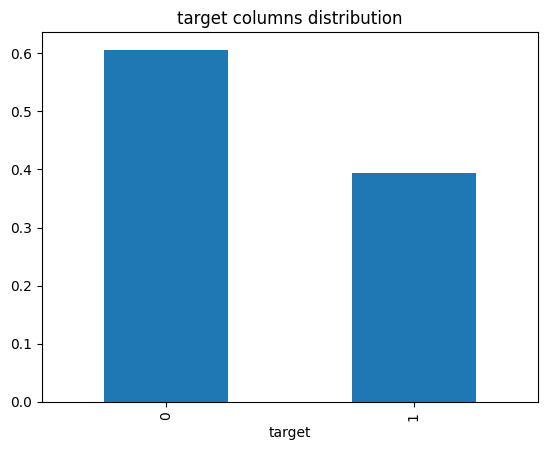

In [14]:
new_data['target'].value_counts(normalize=True).plot(kind='bar', title='target columns distribution')

In [15]:
y = new_data["target"]
x = new_data.drop(labels=["target"],axis=1)

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
feature_bal, target_bal = smote.fit_resample(x, y)

In [17]:
balanced_data = pd.concat([feature_bal,target_bal ])

<Axes: title={'center': 'target columns distribution after balancing'}, xlabel='target'>

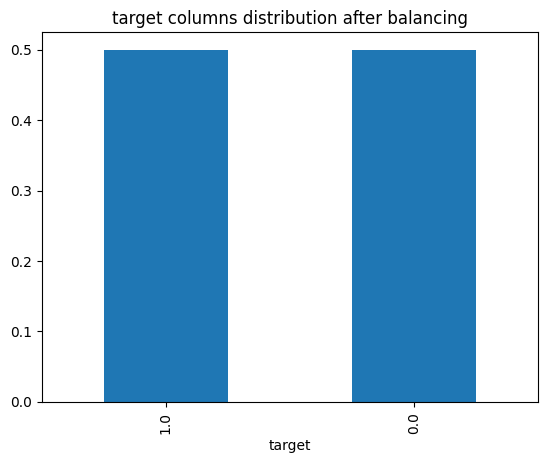

In [18]:
balanced_data["target"].value_counts(normalize=True).plot(kind='bar', title='target columns distribution after balancing')

# ***split the the dataset into test and train***

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_bal, target_bal, test_size=0.2, random_state=42)

In [20]:
X_train.columns = X_train.columns.astype(str)
X_train.columns = X_train.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_test.columns = X_test.columns.astype(str)
X_test.columns = X_test.columns.str.replace(r"[\[\]<>]", "", regex=True)

# ***Train and test the dataset on different model***

In [21]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
training_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in training_models.items():
    print(f"model name: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

model name: Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       558
           1       0.93      0.90      0.92       558

    accuracy                           0.92      1116
   macro avg       0.92      0.92      0.92      1116
weighted avg       0.92      0.92      0.92      1116

model name: Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       558
           1       0.93      0.91      0.92       558

    accuracy                           0.92      1116
   macro avg       0.92      0.92      0.92      1116
weighted avg       0.92      0.92      0.92      1116

model name: Random Forest
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       558
           1       0.95      0.94      0.94       558

    accuracy                           0.95      1116
   macro avg       0.95      0.95      0.95 

/home/adityaraghav/Email_classification/project/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:36:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       558
           1       0.95      0.94      0.95       558

    accuracy                           0.95      1116
   macro avg       0.95      0.95      0.95      1116
weighted avg       0.95      0.95      0.95      1116



# ***Find the best parameters for the selecting model***

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# ***Re-train the model on the best parameters***

In [23]:
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("classification report:")
print(classification_report(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       558
           1       0.95      0.94      0.95       558

    accuracy                           0.95      1116
   macro avg       0.95      0.95      0.95      1116
weighted avg       0.95      0.95      0.95      1116



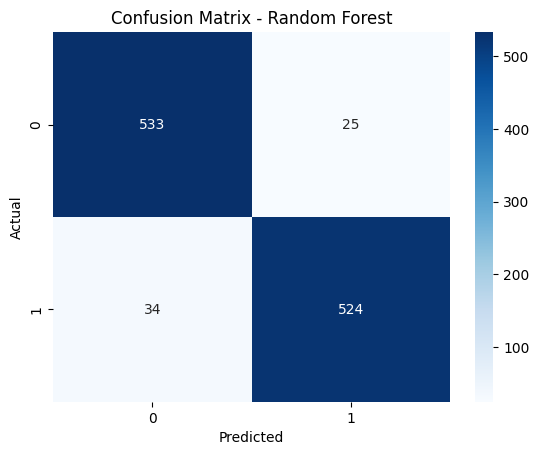

In [24]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()